# Spark Foundation 

## Task 2 :) Prediction of scores of a student based on the no, of hours he/she invested.

## Loading Libraries

In [1]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()
os.chdir("C:\\Users\\Love Karnval\\Desktop\\sparks foundation internship\\task 2")

In [3]:
dataframe = pd.read_csv("student_time_spent - student_scores.csv")
data_values = dataframe.values
X, y = data_values[:, :-1], data_values[:, -1]
# summarize the shape of the dataset
print(X.shape, y.shape)
dataframe.head(10)

(25, 1) (25,)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Correlation Analysis between the two variables

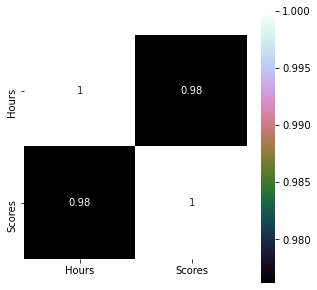

In [4]:
# ### Correlation Analysis : Only for continuous numeric variables.
#   # Correlation plot.NOTE:cp is only for continuous numeric variables.
#   # Extreme Blue:highly positively correlated.
#   # Extreme Red :highly negatively correlated.
colnames=['Hours', 'Scores']
df_corr = dataframe.loc[:,colnames]
# print(df_corr.shape)

corr_mat=dataframe.corr(method='pearson')
plt.figure(figsize=(5,5))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

# brp = brp.drop(['workingday','atemp'],axis=1)
# print(brp.shape)

## Splitting data into train and testing datasets

In [5]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=47)
# summarize the shape of the train and test sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22, 1) (3, 1) (22,) (3,)


# Regression Models

## 1). Linear Regression

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For Linear Regression: %.2f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

final_table = pd.DataFrame(columns=['Model Name','Mae Score', 'Predicted Score for 9.25 hrs'])

a=0
final_table.loc[a] = ['Linear Regression Model'] + [round(mae,2)] + [round(y[0],2)]


MAE For Linear Regression: 4.35
Predicted Score 92.39


## 2). Random Forest Regressor

In [7]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For Random Forest Regression: %.3f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

a+=1
final_table.loc[a] = ['Random Forest Regression'] + [round(mae,2)] + [round(y[0],2)]

MAE For Random Forest Regression: 2.477
Predicted Score 88.9


## 3). Decision Tree Regressor

In [8]:
model = DecisionTreeRegressor(random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For Decision Tree Regression: %.3f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

a+=1
final_table.loc[a] = ['Decision Tree Regression'] + [round(mae,2)] + [round(y[0],2)]

MAE For Decision Tree Regression: 5.000
Predicted Score 88.0


## 4). GB Regressor

In [9]:
model =  GradientBoostingRegressor(random_state=1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For Support Vector Regression: %.3f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

a+=1
final_table.loc[a] = ['GB Regression Model'] + [round(mae,2)] + [round(y[0],2)]

MAE For Support Vector Regression: 4.871
Predicted Score 88.08


## 5). XGB Regressor

In [10]:
model = regressor = xgb.XGBRegressor(
    n_estimators=12,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For XGB Model: %.3f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

a+=1
final_table.loc[a] = ['XGB Regression Model'] + [round(mae,2)] + [round(y[0],2)]

MAE For XGB Model: 4.927
Predicted Score 85.34


## 6). Bayesian Ridge Regression

In [11]:
model = BayesianRidge()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For Bayesian Ridge Regression: %.3f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

a+=1
final_table.loc[a] = ['Bayesian Ridge Regression'] + [round(mae,2)] + [round(y[0],2)]

MAE For Bayesian Ridge Regression: 4.358
Predicted Score 92.29


## 7). Support Vector Regression

In [12]:
model =  SVR(C=1.0, epsilon=0.2)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For Support Vector Regression: %.3f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

a+=1
final_table.loc[a] = ['Support Vector Regression'] + [round(mae,2)] + [round(y[0],2)]

MAE For Support Vector Regression: 20.930
Predicted Score 58.7


## 8). KNN Regression Model

In [13]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For Support Vector Regression: %.3f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

a+=1
final_table.loc[a] = ['KNN Regression'] + [round(mae,2)] + [round(y[0],2)]

MAE For Support Vector Regression: 0.667
Predicted Score 91.5


## Displaying the Final dataframe of models

In [14]:
final_table.sort_values("Mae Score", axis = 0, ascending = True, 
                 inplace = True, na_position ='last') 
final_table

,Model Name,Mae Score,Predicted Score for 9.25 hrs
7,KNN Regression,0.67,91.500000
1,Random Forest Regression,2.48,88.900000
0,Linear Regression Model,4.35,92.390000
5,Bayesian Ridge Regression,4.36,92.290000
3,GB Regression Model,4.87,88.080000
4,XGB Regression Model,4.93,85.339996
2,Decision Tree Regression,5.00,88.000000
6,Support Vector Regression,20.93,58.700000


## Code for deciding the optimum test size to predict the most efficient scores by comparing the mae scores of most efficient models in that test size "x"

In [15]:
## This code can almost take 15-20 minutes to check for the most optimum test size and the random state 
## to fit the model while efficiently decreasing the mae value as it takes the best in every iteration.

"""
from math import sqrt
ff_table = pd.DataFrame(columns=['test size','mae score','model name'])
fff_table = pd.DataFrame(columns=['random state', 'test size','mae score','model name'])
b=0
x=0.10
rs= 1
q=0
while rs <=50:
    x=0.10
    while x <= 0.66:
        dataframe = pd.read_csv("student_time_spent - student_scores.csv")
        data_values = dataframe.values
        X, y = data_values[:, :-1], data_values[:, -1]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=round(x,2), random_state=rs)
        model = LinearRegression()
        model.fit(X_train, y_train) 
        yhat = model.predict(X_test)
        mae = mean_absolute_error(y_test, yhat)
        test = np.array([[9.25]])
        y = model.predict(test)
        final_table = pd.DataFrame(columns=['Model Name','Mae Score', 'Predicted Score for 9.25 hrs'])
        a=0
        final_table.loc[a] = ['Linear Regression Model'] + [round(mae,2)] + [round(y[0],2)]

        model = RandomForestRegressor(random_state=1, n_estimators=32)
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mae = mean_absolute_error(y_test, yhat)
        y = model.predict(test)
        a+=1
        final_table.loc[a] = ['Random Forest Regression'] + [round(mae,2)] + [round(y[0],2)]

        model = DecisionTreeRegressor(random_state=1)
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mae = mean_absolute_error(y_test, yhat)
        y = model.predict(test)
        a+=1
        final_table.loc[a] = ['Decision Tree Regression'] + [round(mae,2)] + [round(y[0],2)]

        model =  GradientBoostingRegressor(random_state=1)
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mae = mean_absolute_error(y_test, yhat)
        y = model.predict(test)
        a+=1
        final_table.loc[a] = ['GB Regression Model'] + [round(mae,2)] + [round(y[0],2)]

        model = regressor = xgb.XGBRegressor(
        n_estimators=100,
        reg_lambda=1,
        gamma=0,
        max_depth=4
        )
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mae = mean_absolute_error(y_test, yhat)
        y = model.predict(test)
        a+=1
        final_table.loc[a] = ['XGB Regression Model'] + [round(mae,2)] + [round(y[0],2)]

        model = BayesianRidge()
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mae = mean_absolute_error(y_test, yhat)
        y = model.predict(test)
        a+=1
        final_table.loc[a] = ['Bayesian Ridge Regression'] + [round(mae,2)] + [round(y[0],2)]

        model =  SVR(C=1.0, epsilon=0.2)
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mae = mean_absolute_error(y_test, yhat)
        y = model.predict(test)
        a+=1
        final_table.loc[a] = ['Support Vector Regression'] + [round(mae,2)] + [round(y[0],2)]

        model = KNeighborsRegressor(n_neighbors = 2)
        model.fit(X_train, y_train)
        yhat = model.predict(X_test)
        mae = mean_absolute_error(y_test, yhat)
        y = model.predict(test)
        a+=1
        final_table.loc[a] = ['KNN Regression'] + [round(mae,2)] + [round(y[0],2)]
        final_table.sort_values("Mae Score", axis = 0, ascending = True, 
                     inplace = True, na_position ='last') 
        ff_table.loc[b] = [x] + [final_table.iloc[0,1]] + [final_table.iloc[0,0]]
        b += 1
        ff_table.sort_values("mae score", axis = 0, ascending = True, 
                         inplace = True, na_position ='last')    
        print(rs," ",round(x,2)," ",ff_table.iloc[0,1]," ",ff_table.iloc[0,2])
        x+=0.01
    rs+=1
fff_table.sort_values("mae score", axis = 0, ascending = True, 
                     inplace = True, na_position ='last') 
fff_table.head(20)        

"""

'\nfrom math import sqrt\nff_table = pd.DataFrame(columns=[\'test size\',\'mae score\',\'model name\'])\nfff_table = pd.DataFrame(columns=[\'random state\', \'test size\',\'mae score\',\'model name\'])\nb=0\nx=0.10\nrs= 1\nq=0\nwhile rs <=50:\n    x=0.10\n    while x <= 0.66:\n        dataframe = pd.read_csv("student_time_spent - student_scores.csv")\n        data_values = dataframe.values\n        X, y = data_values[:, :-1], data_values[:, -1]\n        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=round(x,2), random_state=rs)\n        model = LinearRegression()\n        model.fit(X_train, y_train) \n        yhat = model.predict(X_test)\n        mae = mean_absolute_error(y_test, yhat)\n        test = np.array([[9.25]])\n        y = model.predict(test)\n        final_table = pd.DataFrame(columns=[\'Model Name\',\'Mae Score\', \'Predicted Score for 9.25 hrs\'])\n        a=0\n        final_table.loc[a] = [\'Linear Regression Model\'] + [round(mae,2)] + [round(y[0],2)

## After Running the above code we can clearly see that that the most optipum value of mae is as follows:

### 1)Test Size           =   0.12
### 2)Random State  =   47
### 3)Mae value         =   0.67


# Final Model (KNN Regressor)

In [16]:
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print('MAE For Support Vector Regression: %.3f' % mae)

test = np.array([[9.25]])
y = model.predict(test)
print('Predicted Score',round(y[0],2))

a+=1
final_table.loc[a] = ['KNN Regression'] + [round(mae,2)] + [round(y[0],2)]

MAE For Support Vector Regression: 0.667
Predicted Score 91.5
